###Import Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Import Data set

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


###Basic EDA

In [ ]:
print("The shape of Xtrain is " , len(X_train))
print("The shape of Xtest is " , len(X_test))
print("The shape of one image is ", X_train[0].shape)


The shape of Xtrain is  60000
The shape of Xtest is  10000
The shape of one image is  (28, 28)


Each image has 28X28 pixels

In [ ]:
X_train[0] #This is how an image in the dataset looks like

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

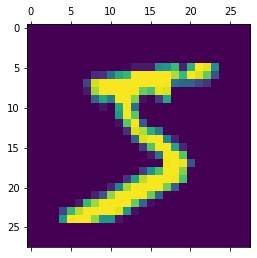

In [ ]:
plt.matshow(X_train[0]) #It shows the image based on array

In [ ]:
y_train[0]

5

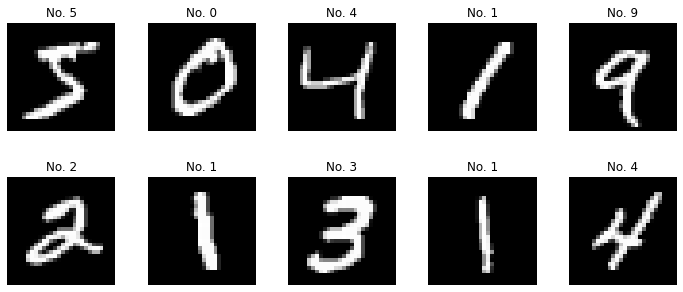

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5), gridspec_kw={'wspace':0.3, 'hspace':0.3}, squeeze=False)

for r in range(num_rows):
  for c in range(num_cols):

    image_index = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow( X_train[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

###Normalization


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train.shape

(60000, 28, 28)

#Flatten in order to convert 3D data to 2D data

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened.shape

(10000, 784)

#Model Building

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

adam is an optimization algorithm which is faster than Stochastic Gradient Descent. The Stochastic Gradient Descent (SGD in short) is just a type of Gradient Descent algorithm.

sparse_categorical_crossentropy is a loss function similar to binary_crossentropy , the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy.

The metrics used to evaluate the model is accuracy. Accuracy calculates how often the predictions calculated by the model are correct.

In [ ]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4672 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9200
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9260


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2672 - accuracy: 0.9273


[0.26721709966659546, 0.927299976348877]

The accuracy is 92 percent

In [ ]:
y_predict = model.predict(X_test_flattened)

In [ ]:
np.argmax(y_predict[0]) #The highest probable element

7

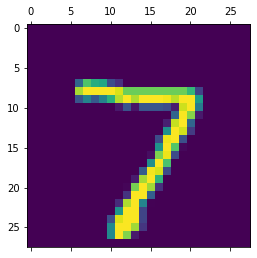

In [ ]:
plt.matshow(X_test[0])

Now add multiple layers and see accuracy

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = (784,), activation = "relu"),
                             tf.keras.layers.Dense(100, input_shape = (784,), activation = "relu"),
                             tf.keras.layers.Dense(10, input_shape = (784,), activation = "sigmoid")
                              ])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(X_train_flattened, y_train, batch_size = 128, epochs = 5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3404 - accuracy: 0.9016
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1362 - accuracy: 0.9597
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0965 - accuracy: 0.9711
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0732 - accuracy: 0.9782
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0572 - accuracy: 0.9828


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9728


[0.08666275441646576, 0.9728000164031982]

#The accuracy increased by increasing neurons and layers

# Model saving

In [ ]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 
